In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%cd /content/drive/MyDrive/21-1/Computational Physics

/content/drive/MyDrive/21-1/Computational Physics


In [138]:
df1=np.genfromtxt('./data/quiz5-1.txt')

In [139]:
pfit1=np.polyfit(df1[:,0],df1[:,1],1)
pfit2=np.polyfit(df1[:,0],df1[:,1],2)
pfit3=np.polyfit(df1[:,0],df1[:,1],3)
pfit4=np.polyfit(df1[:,0],df1[:,1],4)

In [140]:
line1=np.poly1d(pfit1)
line2=np.poly1d(pfit2)
line3=np.poly1d(pfit3)
line4=np.poly1d(pfit4)

x=np.arange(0,1.45,0.05)
y1=line1(x)
y2=line2(x)
y3=line3(x)
y4=line4(x)

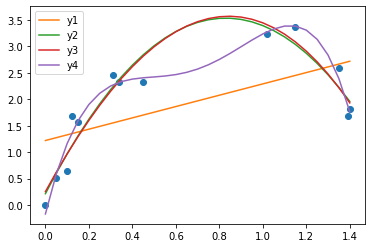

In [141]:
plt.plot(df1[:,0],df1[:,1],'o')
plt.plot(x,y1,label='y1')
plt.plot(x,y2,label='y2')
plt.plot(x,y3,label='y3')
plt.plot(x,y4,label='y4')
plt.legend()

1-2  
데이터를 가장 정확하게 fitting한 함수는 4차함수이다.  
하지만 데이터가 추가된 실험을 할경우 2차함수가 정확도가 높아질것같다.  
 왜냐하면 4차함수는 모든점에 현재 데이터에만 정확하게 fitting하려고 하여 추가데이터가 있을시 overfitting 가능성이 있다.

In [142]:
#1-3
#주어진 함수는 이차함수이므로 2차 fitting을 이용한다
pfit2

array([-4.8276441 ,  8.00422541,  0.21463893])

In [143]:
g=pfit2[0]*-2
v0=pfit2[1]

In [144]:
print(f'초기속도:{v0 :.4} m/s, 중력가속도:{g:.4} m/s^2')

초기속도:8.004 m/s, 중력가속도:9.655 m/s^2


## 2

In [145]:
import scipy as sp
from scipy.optimize import curve_fit


In [146]:
def f(t,a,b):
  return a*t*t+b*t

parm,cov_mat=curve_fit(f,df1[:,0],df1[:,1])

In [147]:
x=np.arange(0,1.45,0.05)
yy=f(x,*parm)

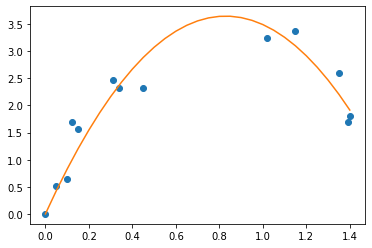

In [148]:
plt.plot(df1[:,0],df1[:,1],'o')
plt.plot(x,yy)

In [135]:
g=parm[0]*-2
v0=parm[1]
print(f'초기속도:{v0 :.4} m/s, 중력가속도:{g:.4} m/s^2')

초기속도:8.8 m/s, 중력가속도:10.62 m/s^2


## 3

In [77]:
df3=np.genfromtxt('./data/quiz5-3.txt')

In [80]:
def f3(x,a1, b1, c1, a2, b2, c2, a3, b3, c3):
  gauss1=a1*np.exp((-(x-b1)**2)/c1**2)
  gauss2=a2*np.exp((-(x-b2)**2)/c2**2)
  gauss3=a3*np.exp((-(x-b3)**2)/c3**2)
  return gauss1+gauss2+gauss3

In [118]:
parm,cov_mat=curve_fit(f3,df3[:,0],df3[:,1],p0=[2,3,0.5,6.3,5,1,5.5,7,3])
x=np.arange(0,10.1,0.1)
yyy=f3(x,*parm)

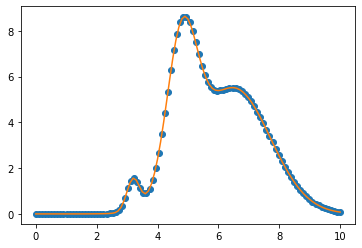

In [119]:
plt.plot(df3[:,0],df3[:,1],'o')
plt.plot(x,yyy)

In [120]:
print('a1:{:.3}, b1:{}, c1:{}'.format(*parm[0:3]))
print('a2:{:.3}, b2:{}, c2:{:.3}'.format(*parm[3:6]))
print('a3:{:.3}, b3:{}, c3:{}'.format(*parm[6:9]))

a1:1.4, b1:3.2, c1:0.3
a2:6.5, b2:4.8, c2:0.7
a3:5.5, b3:6.5, c3:1.7
